# Export a Word Cloud of the Most Significant Time Adverbials in the Corpus

In [1]:
from setup_tools import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

This is Text-Fabric 7.8.7
Api reference : https://annotation.github.io/text-fabric/Api/Fabric/

123 features found and 6 ignored
  0.00s loading features ...
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used
  8.02s All features loaded/computed - for details use loadLog()


## Make a Filter for Pointed Texts

## Tokenize Time Adverbials

Make some exclusions to minimize potential differences:

In [5]:
tokencounts = collections.Counter()

for ta in F.label.s('timephrase'):
    
    tokstring = tokenize_surface(ta, api)    
    tokencounts[tokstring] += 1
    
tokencounts = convert2pandas(tokencounts)

tokencounts.head(10)

,Total
עתה,342
ב.ה.יום.ה.הוא,203
ה.יום,191
ל.עולם,85
ב.ה.בקר,78
עד.ה.יום.ה.זה,71
ב.יום,69
אז,66
שׁבעת.ימים,63
עד.עולם,53


## Plot Wordcloud

Make a selection of which terms to plot.

In [9]:
plot_words = {reverse_hb(word):float(count) for word, count in tokencounts.head(50).to_dict()['Total'].items()}

## Set up the cloud

In [33]:
wordcloud = WordCloud(font_path='/Users/cody/Library/Fonts/Accordance.ttf', 
                      background_color='white',
                      scale=5, 
                      color_func=lambda *args, **kwargs: '#85144b')

cloud = wordcloud.generate_from_frequencies(frequencies=plot_words)

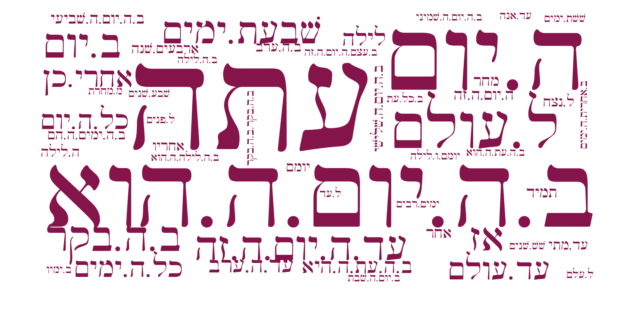

In [37]:
plt.figure(figsize=(10,20), frameon=False)
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')